# Nuclear Data

This notebook will show you key charactheristics of nuclear data and demonstrate ways to access microscopic cross-section data at user selected energies.  This will be done by leverating the data module of OpenMC.

In [2]:
%matplotlib inline
from pprint import pprint

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.patches import Rectangle

import openmc.data

## U235

Read in the U235 pointwise data from the OpenMC HDF5 file.  You will need to change the path and point to the library in order to open the U235.h5 file.

In [17]:
filepath = '/Users/lorenzomazzocco/openmc/endfb80_hdf5/U235.h5'
u235_ace = openmc.data.IncidentNeutron.from_hdf5(filepath)

Read in the fission cross section and energy points. Plot the U235 fission cross section (MT=18).  You will notice the "1/v" shape of the fission cross-section. This block also prints the number of energy points on which the cross-section at 294K is stored, which in this case is 76,514 points.

76027


Text(0, 0.5, 'Cross section (b)')

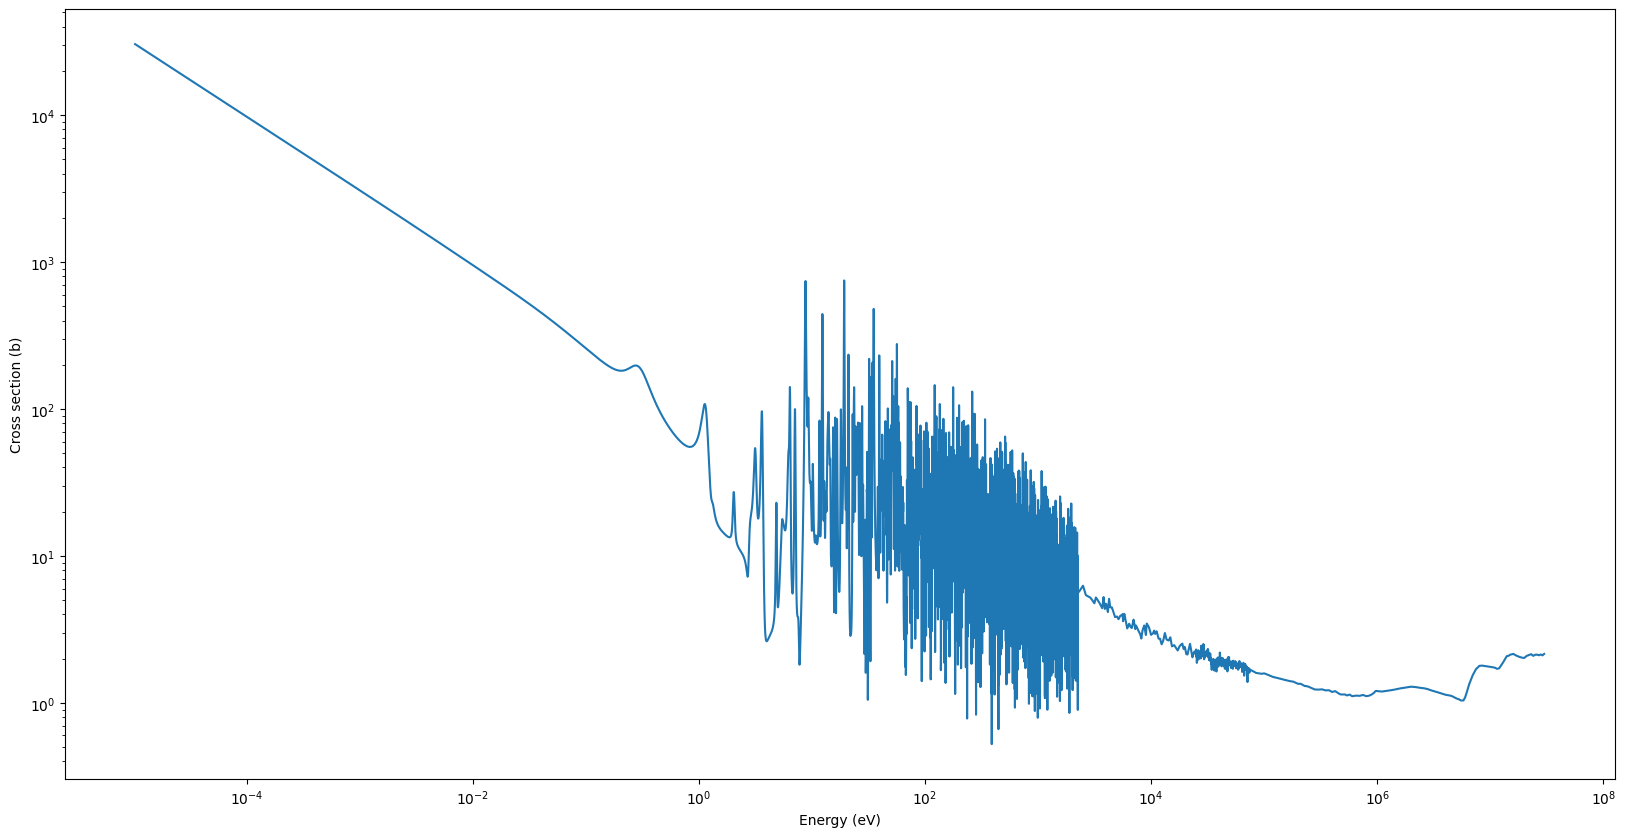

In [18]:
fission = u235_ace[18] #18 is fission
energies = u235_ace.energy['294K']  #energies contains the grid points on which the cross-sections are stored
print(len(energies))  # The number of grid points for a given nuclide at a given temperature is the same for all reactions.
fiss_xs = fission.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.loglog(energies[1:], fiss_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

Fission cross section at 0.025 eV (Energy of the most probable velocity at 300K) can be queried by this command.  When the exact queried energy point does not exist in the library, linear interpolation is used between the nearest neighbors.  This is the basis of the pointwise data format commonly called ACE which is used by most Monte Carlo codes.

In [19]:
fission.xs['294K'](0.025)

590.4582981132075

Print the list of all reactions available for U235.  Every nuclide has a list of possible reactions and their sum makes up the total cross-section.  Each MT number corresponds to a particular reaction, and each reaction has the same energy grid.

In [20]:
pprint(list(u235_ace.reactions.values())[:500])

[<Reaction: MT=2 (n,elastic)>,
 <Reaction: MT=4 (n,level)>,
 <Reaction: MT=5 (n,misc)>,
 <Reaction: MT=16 (n,2n)>,
 <Reaction: MT=17 (n,3n)>,
 <Reaction: MT=18 (n,fission)>,
 <Reaction: MT=51 (n,n1)>,
 <Reaction: MT=52 (n,n2)>,
 <Reaction: MT=53 (n,n3)>,
 <Reaction: MT=54 (n,n4)>,
 <Reaction: MT=55 (n,n5)>,
 <Reaction: MT=56 (n,n6)>,
 <Reaction: MT=57 (n,n7)>,
 <Reaction: MT=58 (n,n8)>,
 <Reaction: MT=59 (n,n9)>,
 <Reaction: MT=60 (n,n10)>,
 <Reaction: MT=61 (n,n11)>,
 <Reaction: MT=62 (n,n12)>,
 <Reaction: MT=63 (n,n13)>,
 <Reaction: MT=64 (n,n14)>,
 <Reaction: MT=65 (n,n15)>,
 <Reaction: MT=66 (n,n16)>,
 <Reaction: MT=67 (n,n17)>,
 <Reaction: MT=68 (n,n18)>,
 <Reaction: MT=69 (n,n19)>,
 <Reaction: MT=70 (n,n20)>,
 <Reaction: MT=71 (n,n21)>,
 <Reaction: MT=72 (n,n22)>,
 <Reaction: MT=73 (n,n23)>,
 <Reaction: MT=74 (n,n24)>,
 <Reaction: MT=75 (n,n25)>,
 <Reaction: MT=76 (n,n26)>,
 <Reaction: MT=77 (n,n27)>,
 <Reaction: MT=78 (n,n28)>,
 <Reaction: MT=79 (n,n29)>,
 <Reaction: MT=80 (n,n3

The capture cross-section can also be plotted.

76027


Text(0, 0.5, 'Cross section (b)')

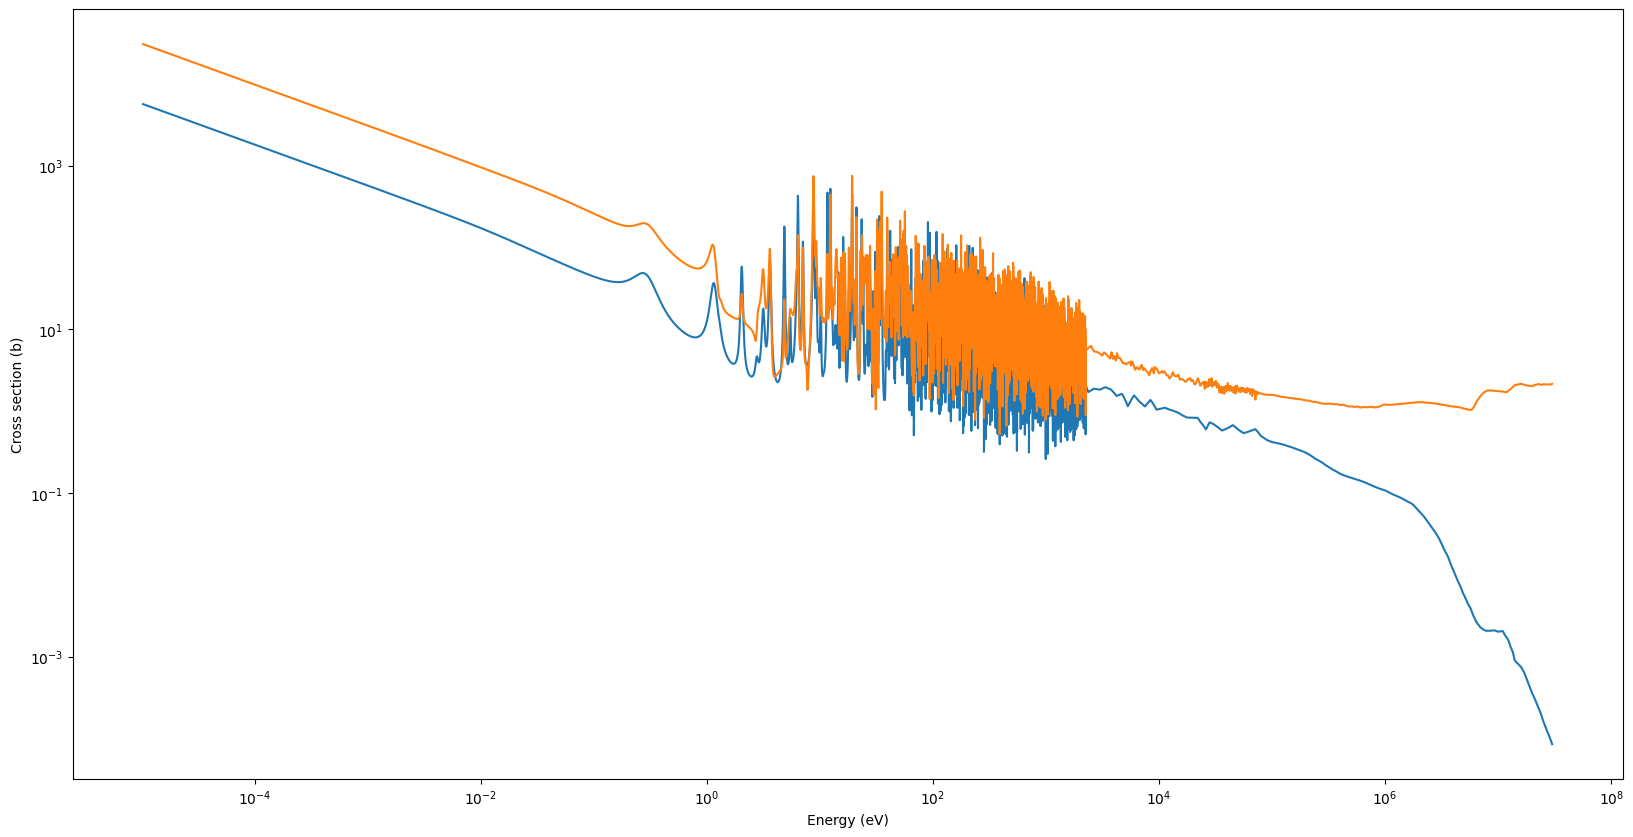

In [21]:
capture = u235_ace[102] #102 is capture
energies = u235_ace.energy['294K']
capt_xs = capture.xs['294K'](energies)
print(len(energies))
plt.figure(figsize=(20,10))
plt.loglog(energies[1:], capt_xs[1:])
plt.loglog(energies[1:], fiss_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

Or in this case the fission to capture ratio showing that fission is more likely than radiative capture for most of the U235 energy range.

Text(0, 0.5, 'Fission to capture ratio')

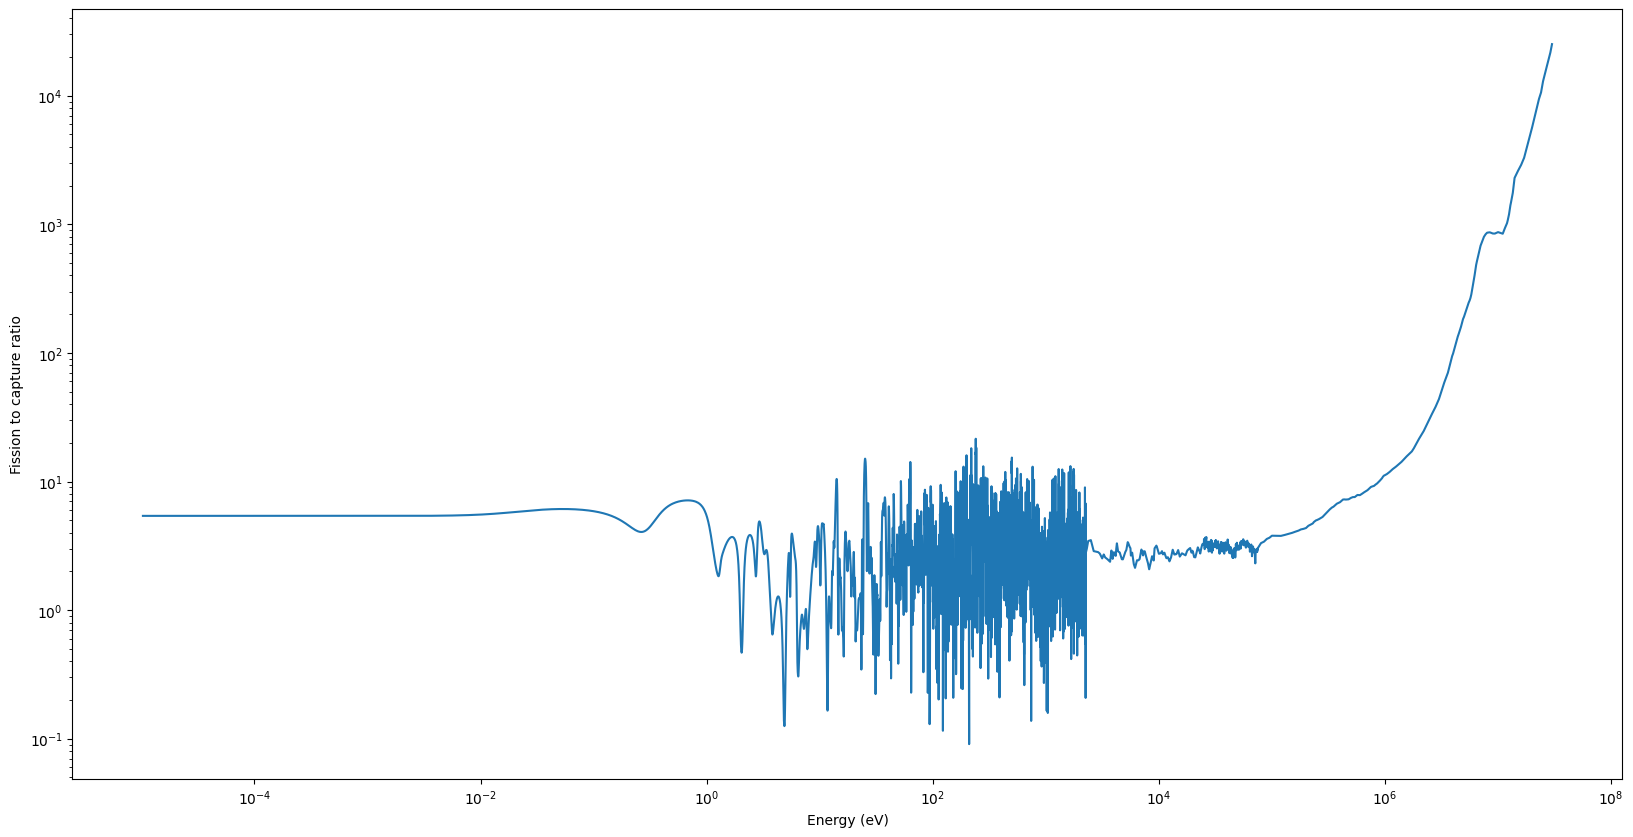

In [22]:
plt.figure(figsize=(20,10))
plt.loglog(energies[1:], fiss_xs[1:]/capt_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Fission to capture ratio')

Print the products of the fission reaction. This list only includes prompt and delayed neutrons as well as prompt photons.  Fission also produces fission products which are not in a steady-state simulation but necessary when looking at fuel evolution. The fission products will in turn produce delayed photons and betas. Other products like neutrinos are not tracked in reactor simulations since they will not interact locally.

In [23]:
fission.products

[<Product: neutron, emission=prompt, yield=tabulated>,
 <Product: neutron, emission=delayed, yield=tabulated>,
 <Product: neutron, emission=delayed, yield=tabulated>,
 <Product: neutron, emission=delayed, yield=tabulated>,
 <Product: neutron, emission=delayed, yield=tabulated>,
 <Product: neutron, emission=delayed, yield=tabulated>,
 <Product: neutron, emission=delayed, yield=tabulated>,
 <Product: photon, emission=prompt, yield=tabulated>]

Plot the prompt neutron emission spectrum

In [24]:
#Prompt neutrons
prompt = fission.products[0]
prompt.distribution

In [25]:
prompt_dist = prompt.distribution[0]

In [26]:
prompt_dist.energy.energy_out

The following block shows the prompt neutron fission spectrum as a function of the energy causing fission.  

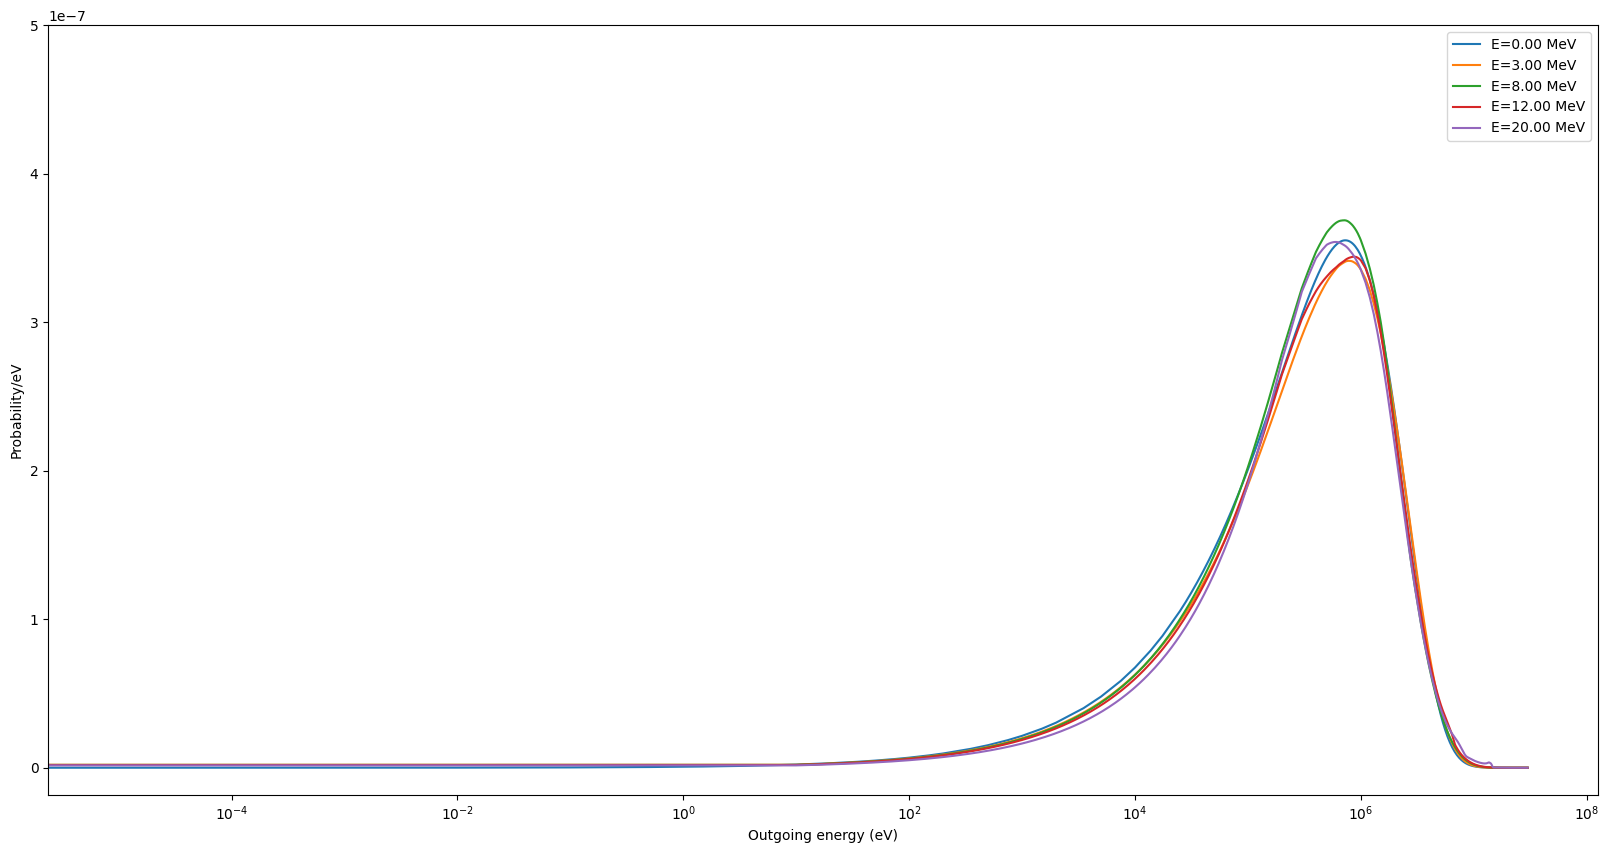

In [27]:
plt.figure(figsize=(20,10))
for e_in, e_out_dist in zip(prompt_dist.energy.energy[::5], prompt_dist.energy.energy_out[::5]):
    plt.semilogx(e_out_dist.x, e_out_dist.p, label='E={:.2f} MeV'.format(e_in/1e6))
plt.ylim(ymax=0.5e-6)
plt.legend()
plt.xlabel('Outgoing energy (eV)')
plt.ylabel('Probability/eV')
plt.show()

Plot the delayed neutron emission spectrum

In [28]:
delayed3 = fission.products[3]

In [29]:
delayed3_dist = delayed3.distribution[0]

In [30]:
delayed3_dist.energy.energy_out

And here, we plot the delayed neutron spectrum for the 4th delayed group.  First thing to notice is that the average value is about 1 order of magnitude lower than for prompt neutrons.  

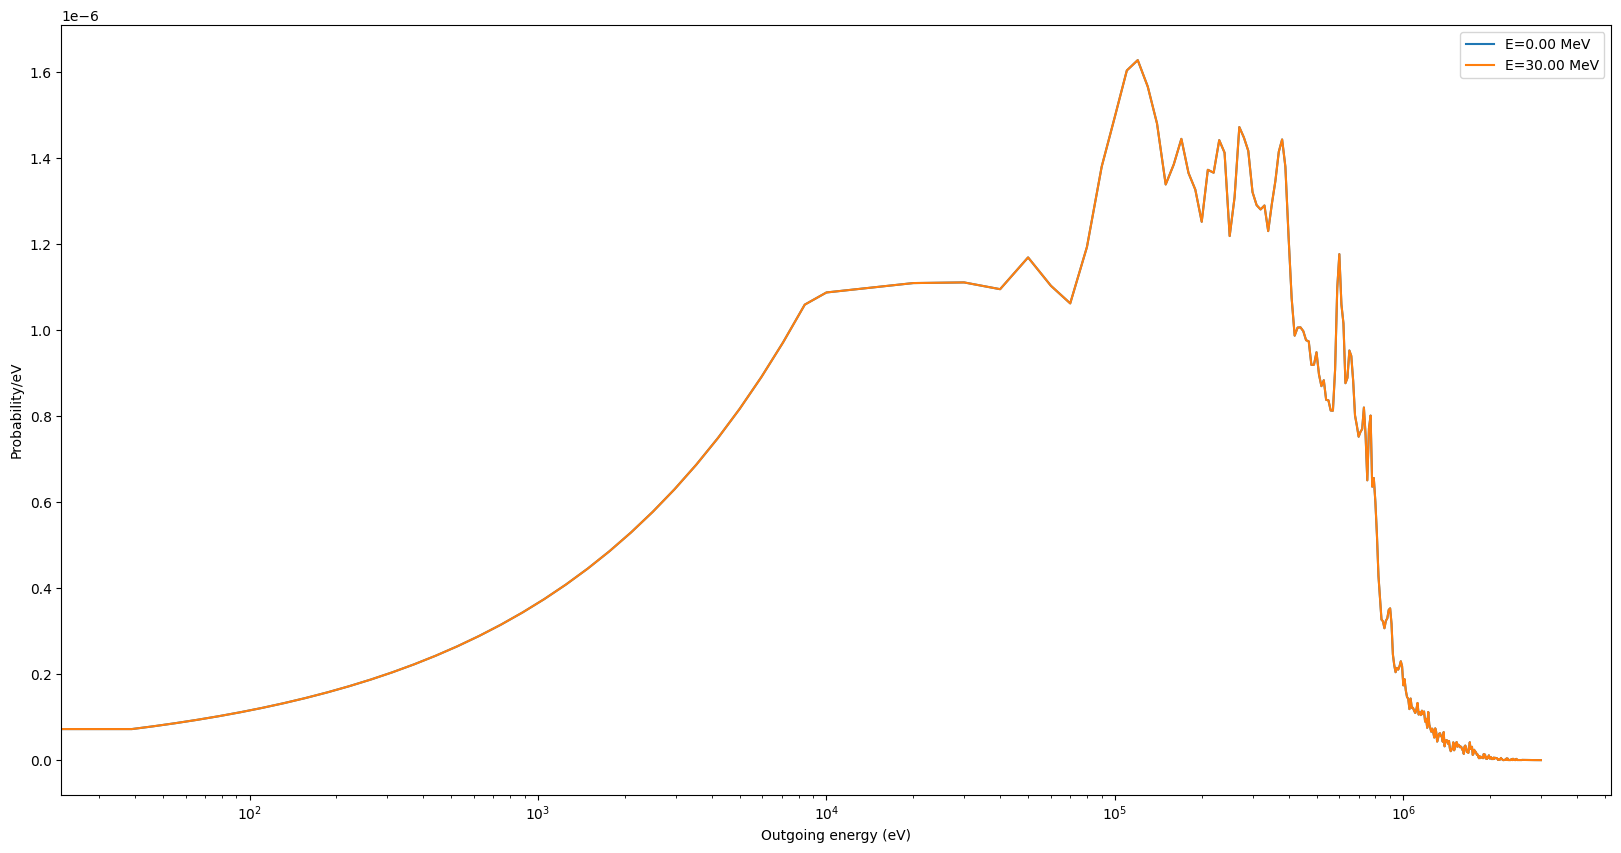

In [31]:
plt.figure(figsize=(20,10))
for e_in, e_out_dist in zip(delayed3_dist.energy.energy[::1], delayed3_dist.energy.energy_out[::1]):
    plt.semilogx(e_out_dist.x, e_out_dist.p, label='E={:.2f} MeV'.format(e_in/1e6))
#plt.ylim(ymax=0.5e-6)
plt.legend()
plt.xlabel('Outgoing energy (eV)')
plt.ylabel('Probability/eV')
plt.show()

Plot the prompt photon emission spectrum

In [32]:
photon = fission.products[7]
photon.distribution

In [33]:
photon_dist = photon.distribution[0]

In [34]:
photon_dist.energy.energy_out

Here is the prompt photon energy distribution following a fission event.

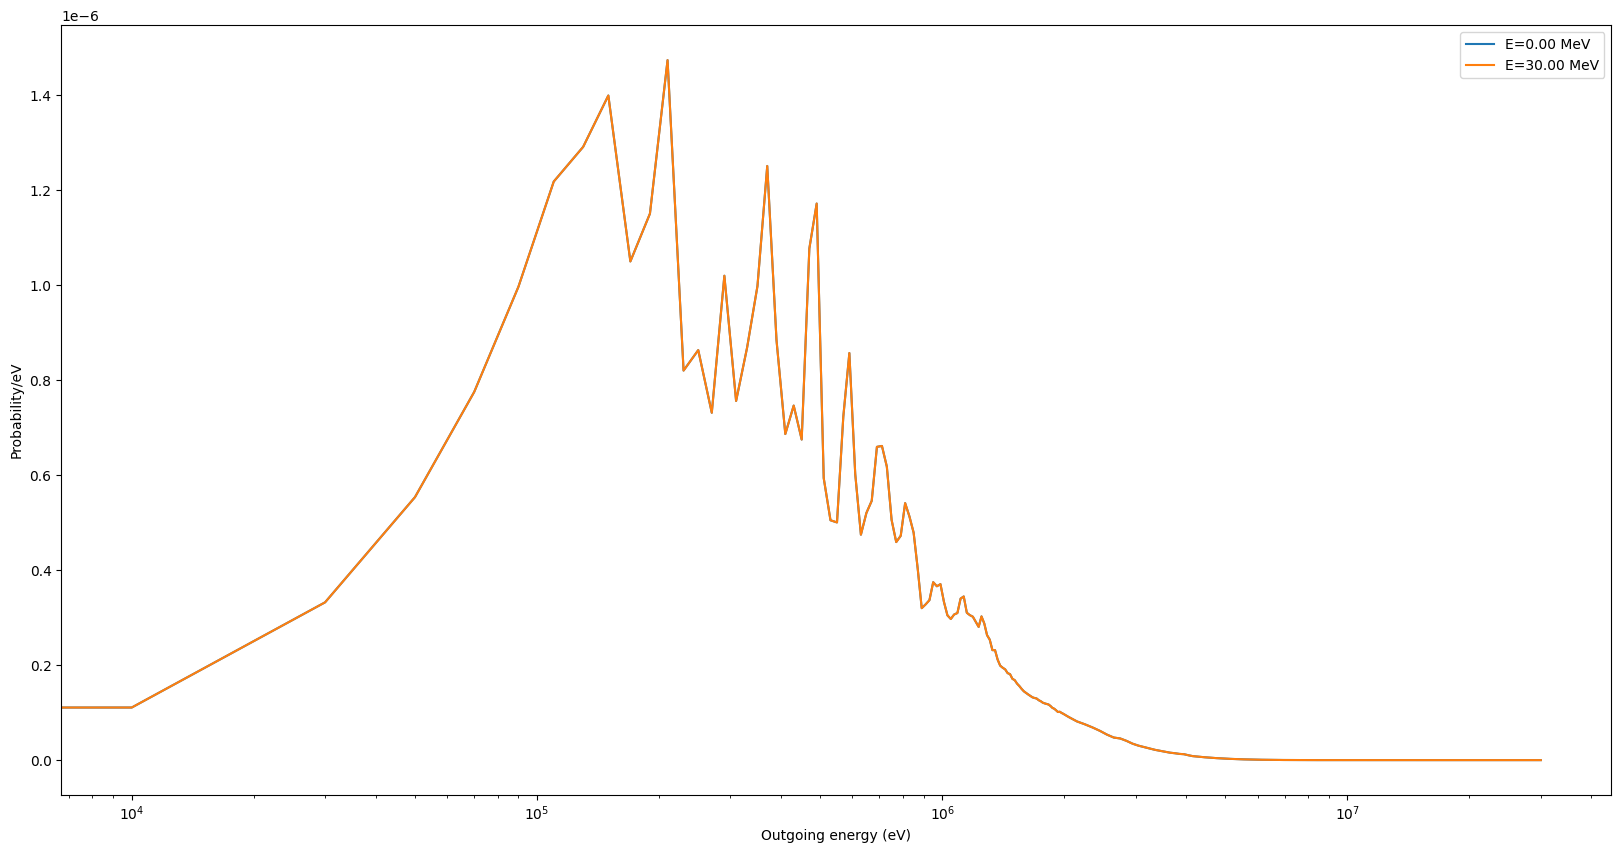

In [35]:
plt.figure(figsize=(20,10))
for e_in, e_out_dist in zip(photon_dist.energy.energy[::1], photon_dist.energy.energy_out[::1]):
    plt.semilogx(e_out_dist.x, e_out_dist.p, label='E={:.2f} MeV'.format(e_in/1e6))
#plt.ylim(ymax=0.5e-6)
plt.legend()
plt.xlabel('Outgoing energy (eV)')
plt.ylabel('Probability/eV')
plt.show()

In [36]:
u235_ace.atomic_number

92

In [37]:
u235_ace.atomic_symbol

'U'

In [38]:
u235_ace.atomic_weight_ratio

233.0248

Print the energy released from U235 fission (in eV)

In [39]:
fission.q_value

193405400.0

Plot the neutron yield from U235 fission

In [40]:
derived = fission.derived_products[0]

In [41]:
derived.particle

'neutron'

In [42]:
derived.yield_

In [43]:
derived.yield_(1.0) #in eV

2.43385

It should also be noted that the number of prompt neutrons released from fission is energy dependent and will increase with an increase in the incoming energy of the neutron causing fission.

Text(0, 0.5, 'Yield (neutrons)')

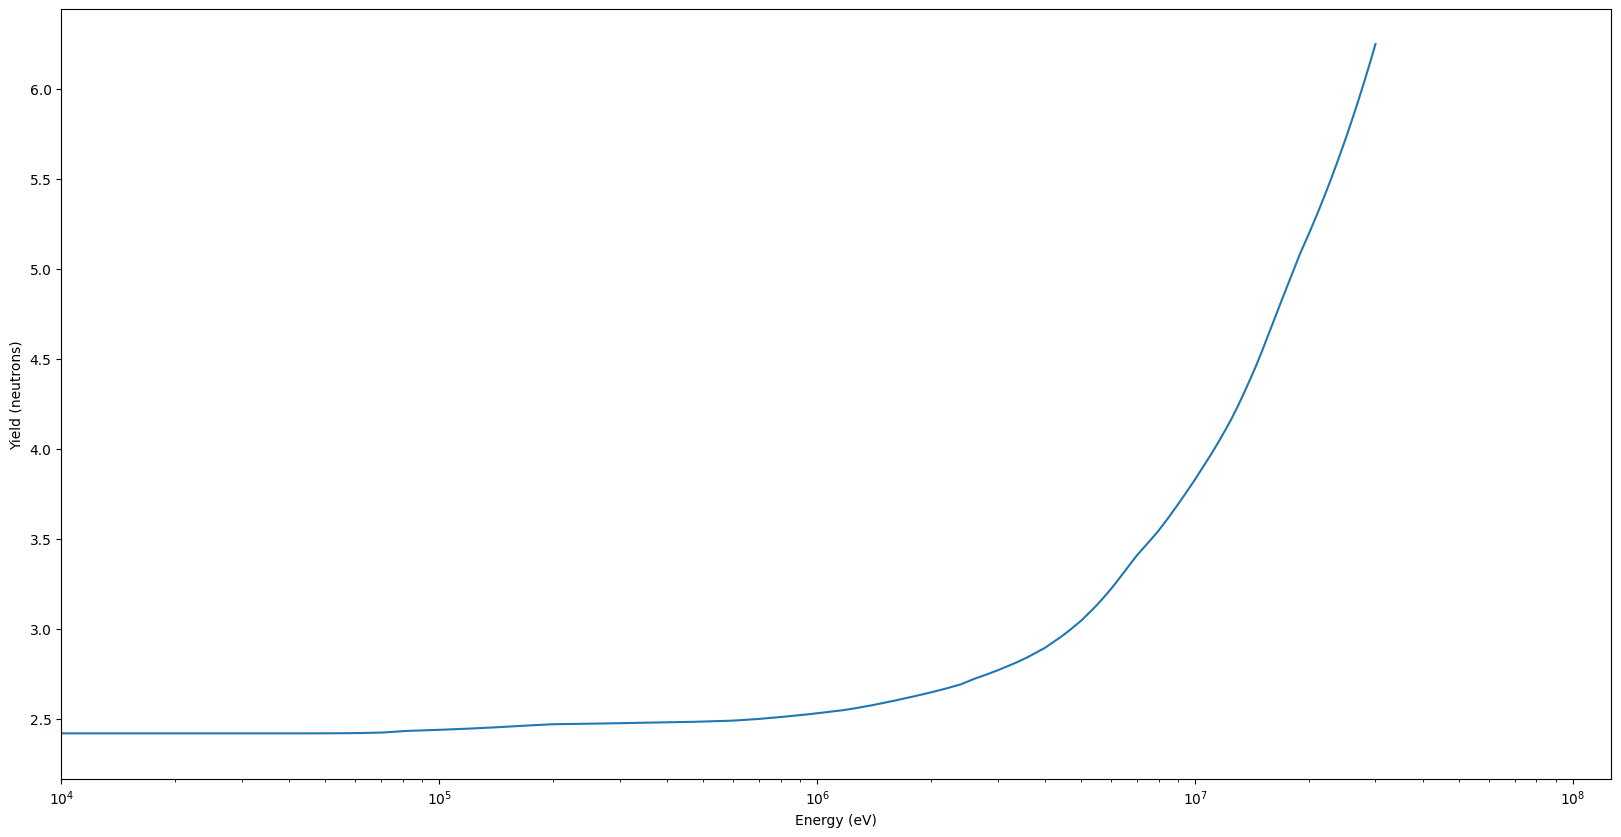

In [44]:
energies = u235_ace.energy['294K']
fiss_xs = fission.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.semilogx(energies, derived.yield_(energies))
plt.xlabel('Energy (eV)')
plt.xlim(xmin=1e4)
plt.ylabel('Yield (neutrons)')

## U238

Similarly for U238.

In [61]:
filepath = '/Users/lorenzomazzocco/openmc/endfb80_hdf5/U238.h5'
u238_ace = openmc.data.IncidentNeutron.from_hdf5(filepath)

In [62]:
pprint(list(u235_ace.reactions.values())[:500])

[<Reaction: MT=2 (n,elastic)>,
 <Reaction: MT=4 (n,level)>,
 <Reaction: MT=5 (n,misc)>,
 <Reaction: MT=16 (n,2n)>,
 <Reaction: MT=17 (n,3n)>,
 <Reaction: MT=18 (n,fission)>,
 <Reaction: MT=51 (n,n1)>,
 <Reaction: MT=52 (n,n2)>,
 <Reaction: MT=53 (n,n3)>,
 <Reaction: MT=54 (n,n4)>,
 <Reaction: MT=55 (n,n5)>,
 <Reaction: MT=56 (n,n6)>,
 <Reaction: MT=57 (n,n7)>,
 <Reaction: MT=58 (n,n8)>,
 <Reaction: MT=59 (n,n9)>,
 <Reaction: MT=60 (n,n10)>,
 <Reaction: MT=61 (n,n11)>,
 <Reaction: MT=62 (n,n12)>,
 <Reaction: MT=63 (n,n13)>,
 <Reaction: MT=64 (n,n14)>,
 <Reaction: MT=65 (n,n15)>,
 <Reaction: MT=66 (n,n16)>,
 <Reaction: MT=67 (n,n17)>,
 <Reaction: MT=68 (n,n18)>,
 <Reaction: MT=69 (n,n19)>,
 <Reaction: MT=70 (n,n20)>,
 <Reaction: MT=71 (n,n21)>,
 <Reaction: MT=72 (n,n22)>,
 <Reaction: MT=73 (n,n23)>,
 <Reaction: MT=74 (n,n24)>,
 <Reaction: MT=75 (n,n25)>,
 <Reaction: MT=76 (n,n26)>,
 <Reaction: MT=77 (n,n27)>,
 <Reaction: MT=78 (n,n28)>,
 <Reaction: MT=79 (n,n29)>,
 <Reaction: MT=80 (n,n3

U238 is considered a threshold fission reaction since the activation energy is greater than the binding energy of the last neutron added.  Quantum tunnelling effects permits fission to happen on very rare occasions until that threshold is met with higher energy neutrons (> 1MeV).

Text(0, 0.5, 'Cross section (b)')

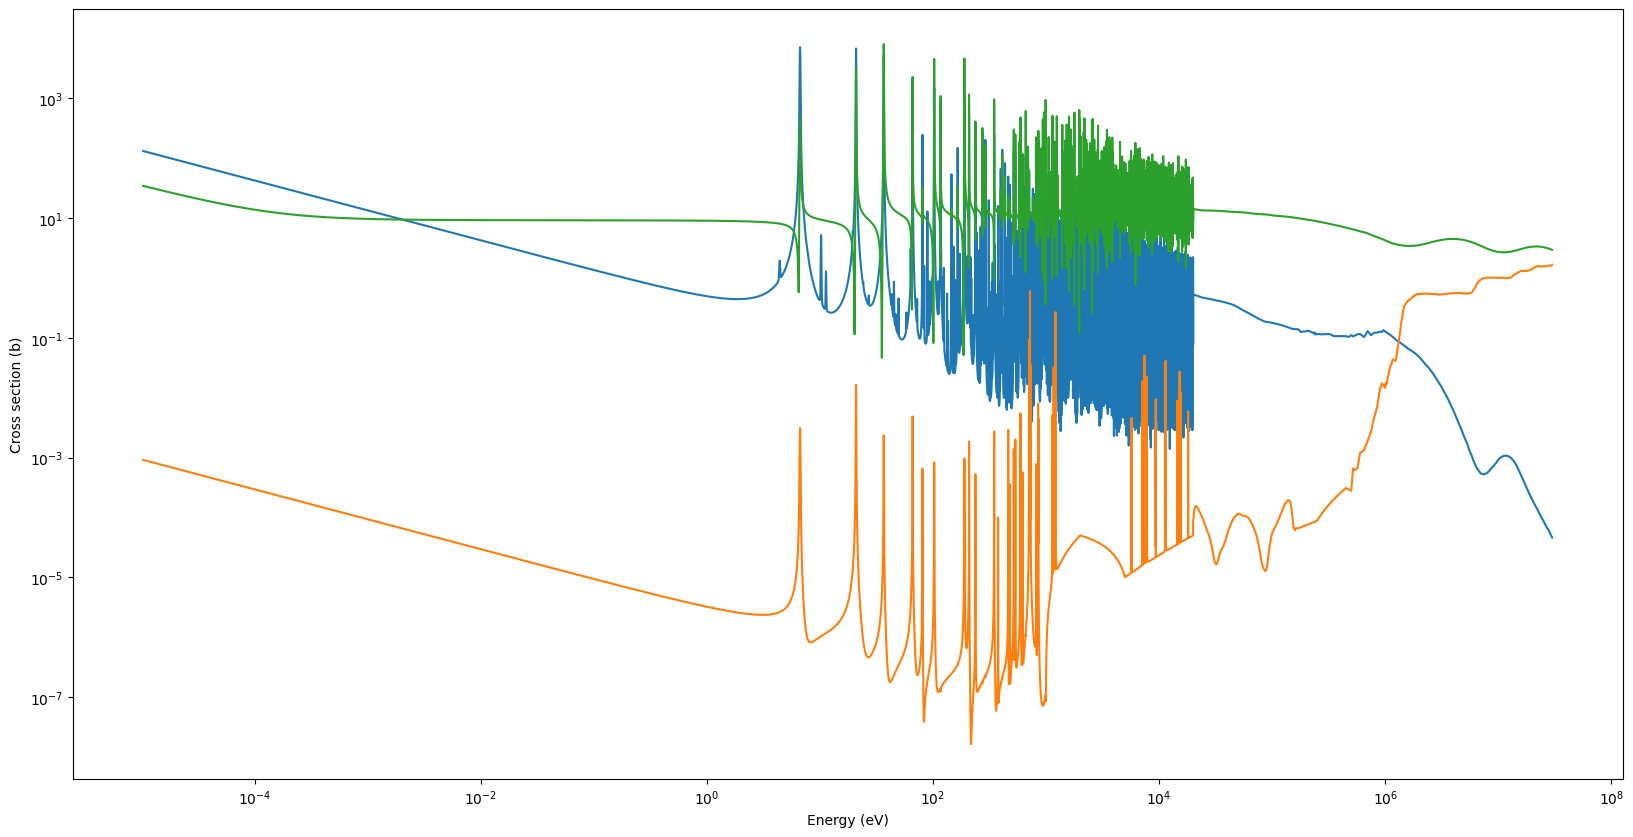

In [63]:
fission = u238_ace[18] #18 is fission
energies = u238_ace.energy['294K']
fiss_xs = fission.xs['294K'](energies)
capture = u238_ace[102] 
capt_xs = capture.xs['294K'](energies)
elastic = u238_ace[2] 
elas_xs = elastic.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.loglog(energies[1:], capt_xs[1:])
plt.loglog(energies[1:], fiss_xs[1:])
plt.loglog(energies[1:], elas_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

The scattering reaction shows very clearly the three different components (potential scattering, resonant scattering, interference).  The interference effect can be seen clearly by the dip in s-wave resonances (Chi function from SLBW model).  This interference effect only shows up in the scattering cross-section.  Notice also that the resonance behavior is aligned across cross-section type since they all represent different outgoing channels for the same excited state.

Text(0, 0.5, 'Cross section (b)')

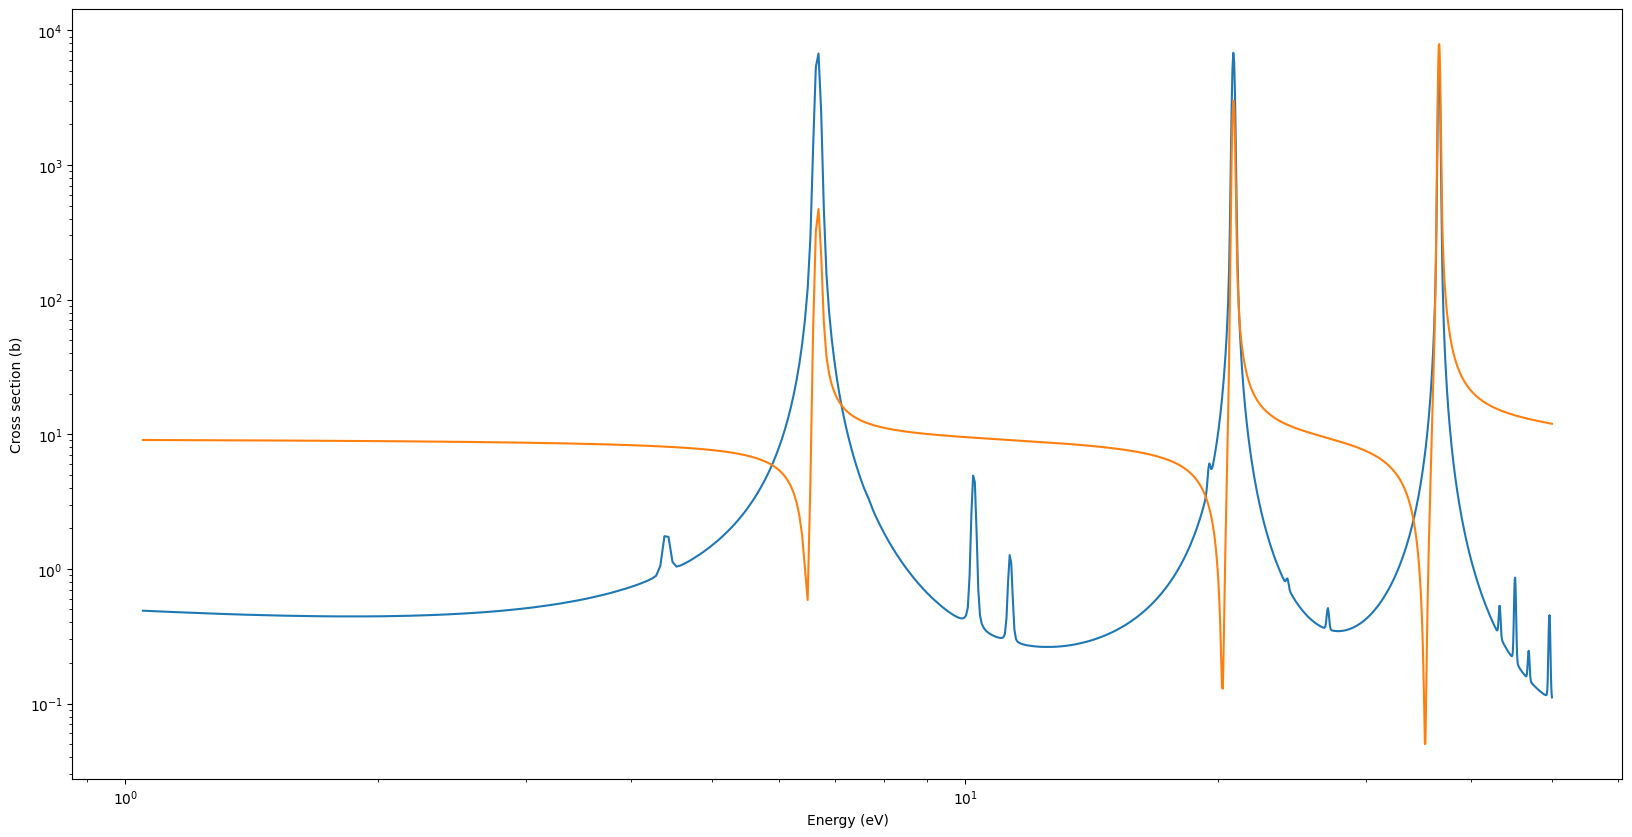

In [64]:
energies = np.linspace(1.0, 50.0, 1000)
capt_xs = capture.xs['294K'](energies)
elas_xs = elastic.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.loglog(energies[1:], capt_xs[1:])
plt.loglog(energies[1:], elas_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

The capture cross-section shows the "1/v" behavior in the thermal range.

Text(0, 0.5, 'Cross section (b)')

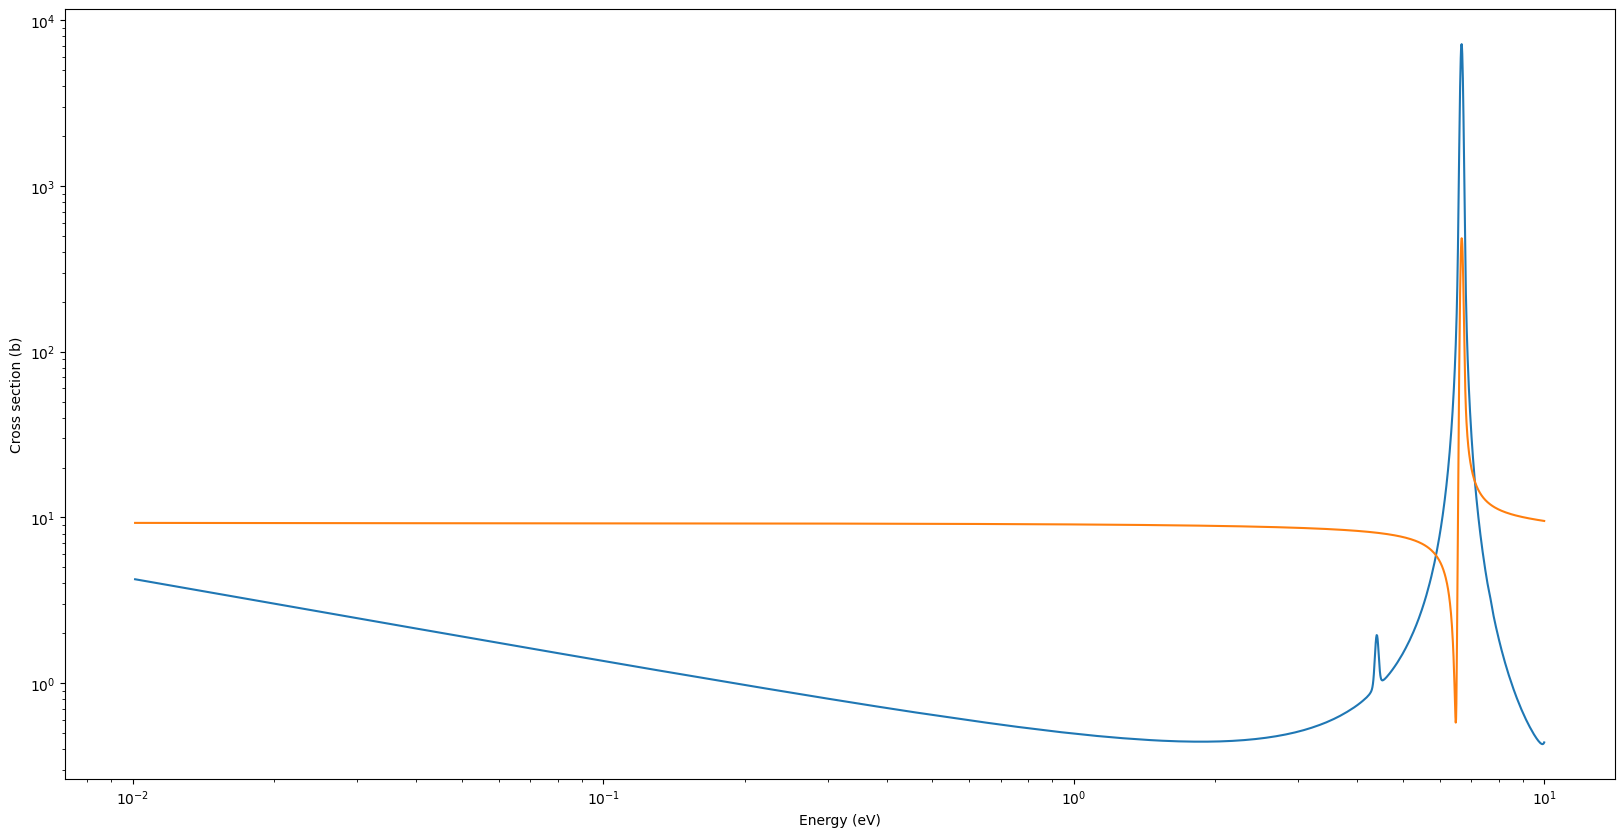

In [65]:
energies = np.linspace(0.0001, 10.0, 1000)
capt_xs = capture.xs['294K'](energies)
elas_xs = elastic.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.loglog(energies[1:], capt_xs[1:])
plt.loglog(energies[1:], elas_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

Another important things to observe is that resonance spacing is fairly constant across the entire energy range.  Plotting in loglog makes it appear that resonances at high energy are more tighly packed, but that is an artifact of the loglog scale.  On a linear scale we can see that the number of resonance per energy interval (50 eV in the following plots) remains similar (large peaks are typically s waves and lower peaks p waves).

Text(0, 0.5, 'Cross section (b)')

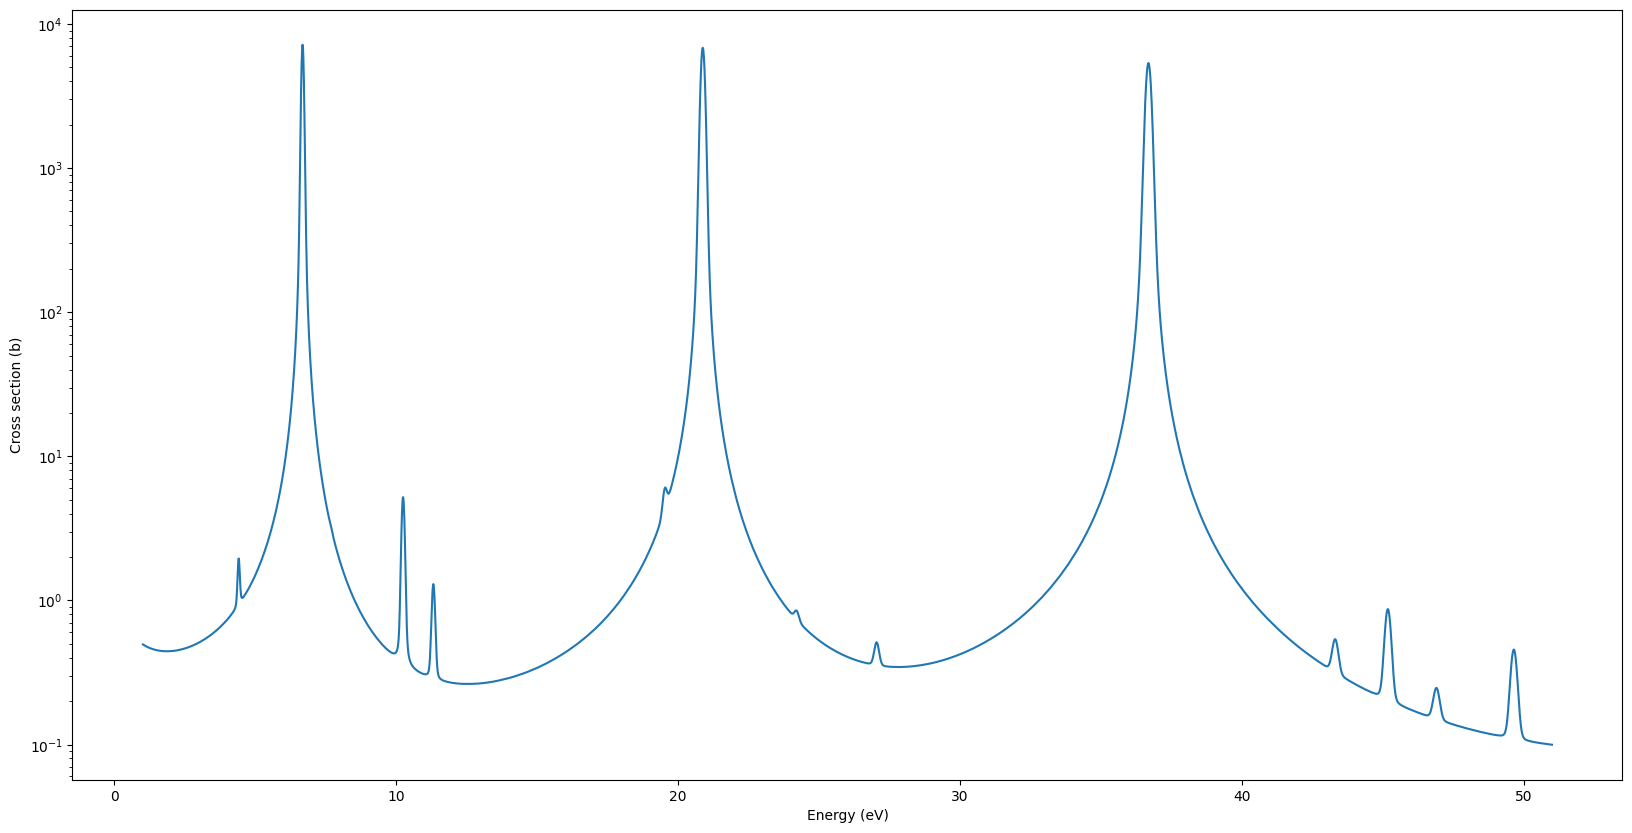

In [66]:
energies = np.linspace(1.0, 51.0, 5000)
capt_xs = capture.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.semilogy(energies[1:], capt_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

Text(0, 0.5, 'Cross section (b)')

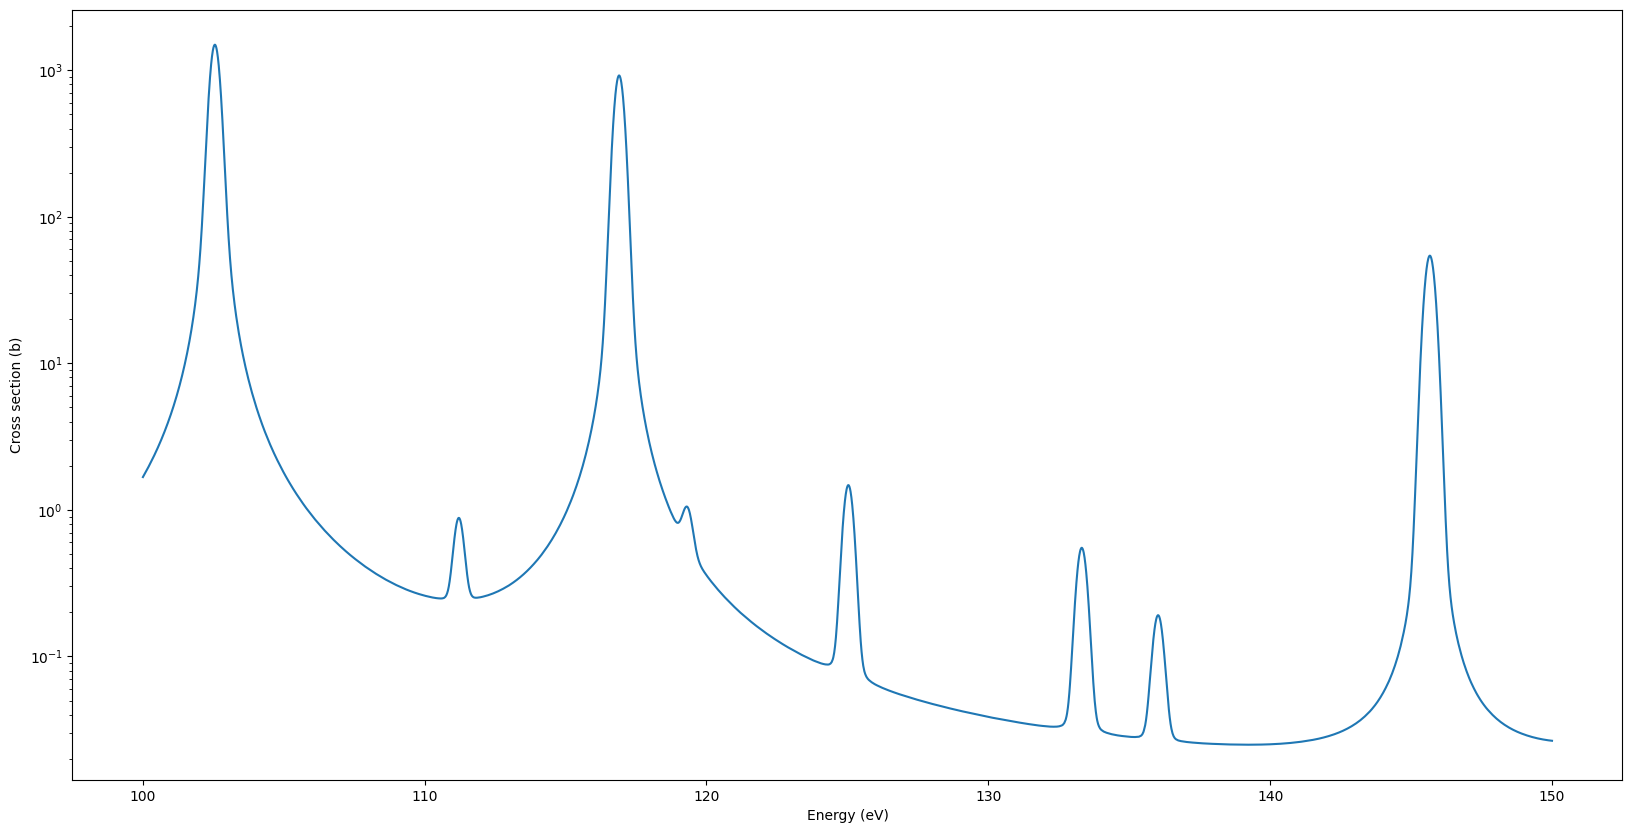

In [67]:
energies = np.linspace(100.0, 150.0, 5000)
capt_xs = capture.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.semilogy(energies[1:], capt_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

Text(0, 0.5, 'Cross section (b)')

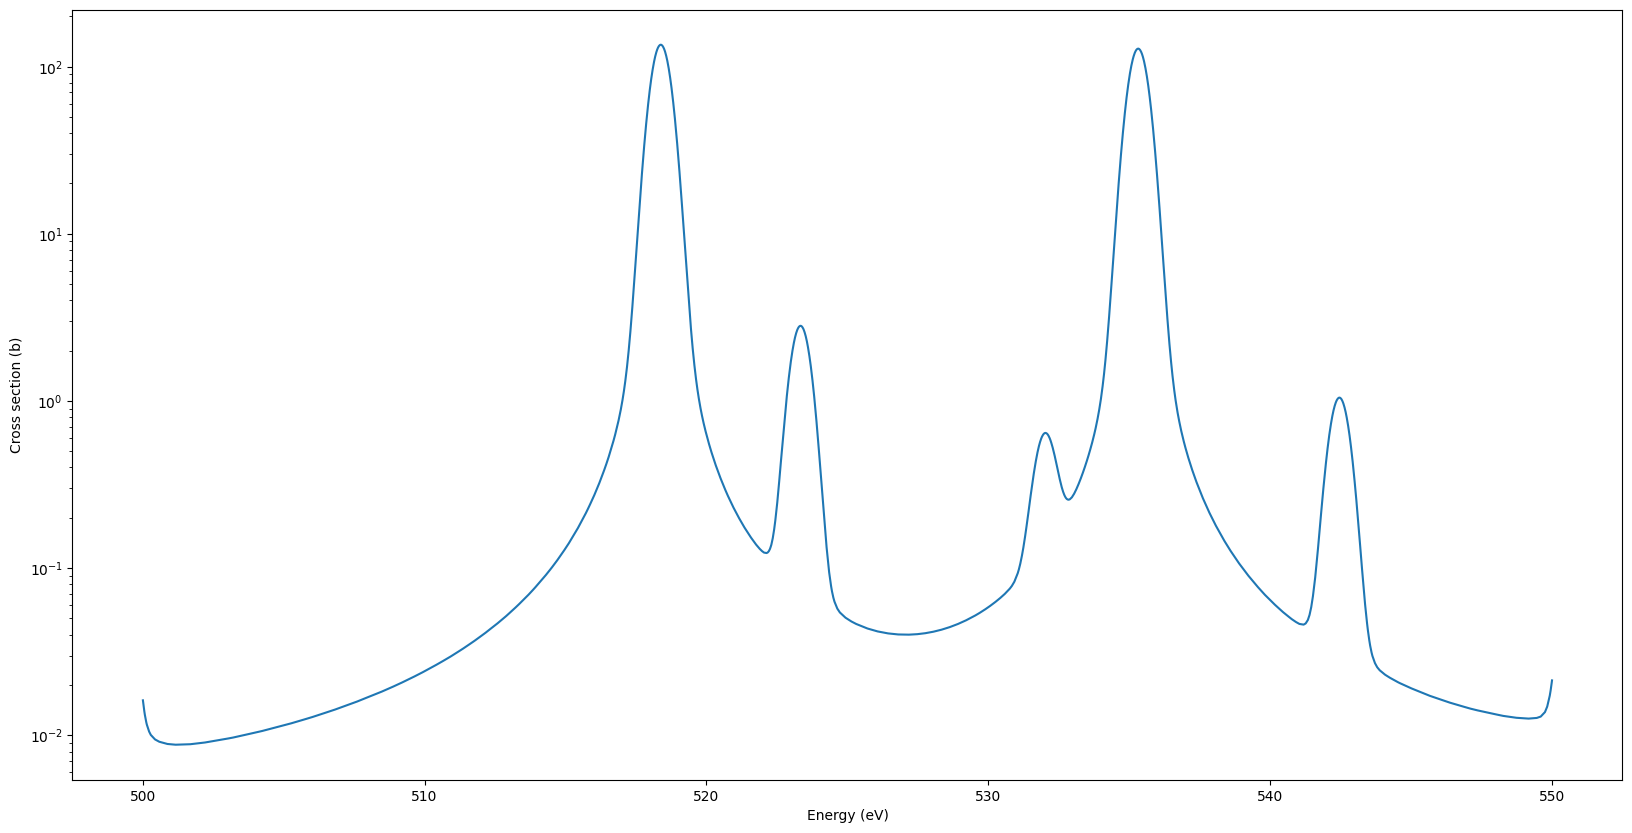

In [68]:
energies = np.linspace(500.0, 550.0, 5000)
capt_xs = capture.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.semilogy(energies[1:], capt_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

## Threshold Reactions

Typical threshold reactions occur for inelastic scattering and n,xn reactions. The inelastic scattering channels start at lower threshold energies since only one particle is ejected from the compound nucleus. Reactions like n,2n require additional kinetic energy such that 2 neutrons can be freed.

Text(0, 0.5, 'Cross section (b)')

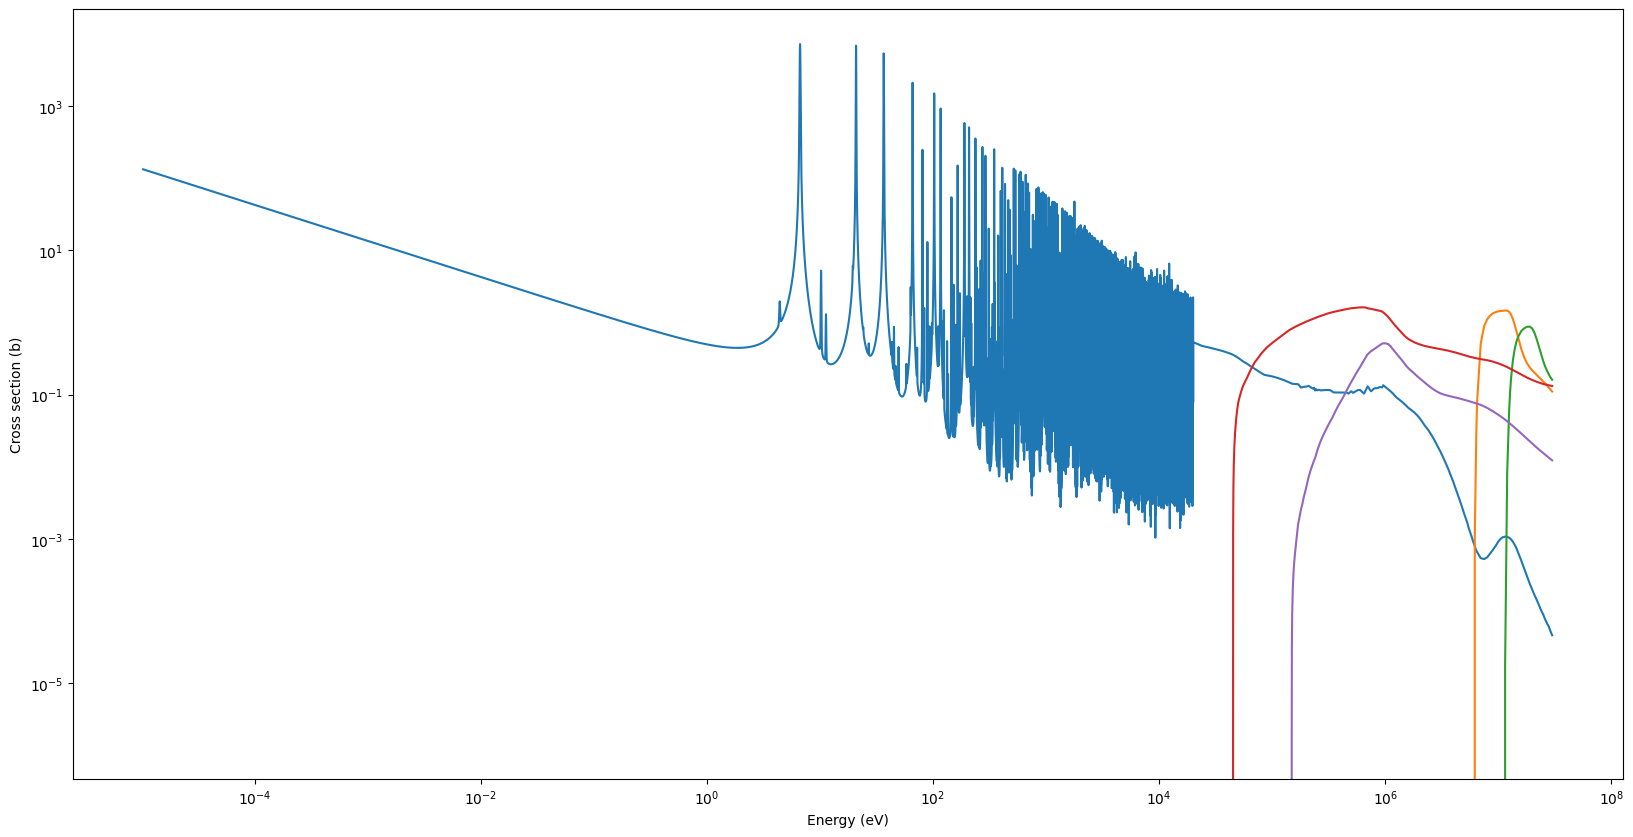

In [69]:
n2n = u238_ace[16] #18 is fission
energies = u238_ace.energy['294K']
n2n_xs = n2n.xs['294K'](energies)
n3n = u238_ace[17] #18 is fission
n3n_xs = n3n.xs['294K'](energies)
nn1 = u238_ace[51] #18 is fission
nn1_xs = nn1.xs['294K'](energies)
nn2 = u238_ace[52] #18 is fission
nn2_xs = nn2.xs['294K'](energies)
capture = u238_ace[102] 
capt_xs = capture.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.loglog(energies[1:], capt_xs[1:])
plt.loglog(energies[1:], n2n_xs[1:])
plt.loglog(energies[1:], n3n_xs[1:])
plt.loglog(energies[1:], nn1_xs[1:])
plt.loglog(energies[1:], nn2_xs[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

## Doppler Broadening

Doppler broadening captures the motion of the target with which the neutron collides.  Typically, this motion is represented by as a free gas (Maxwell-Boltzmann distribution of target velocities) and a convolution integral is performed between the cross-section shape and the target velocity distribution.  This is typically done by a method called SIGMA1 that requires a point-wise representation of the cross-section such that the integral can be performed.  Variations of this process now exist and one such variant named windowed multipole (WMP) formalism has been implemented in OpenMC. WMP keeps the cross-sections in resonance parameter form and integrates the convolution integral analytically.

Text(0, 0.5, 'Cross section (b)')

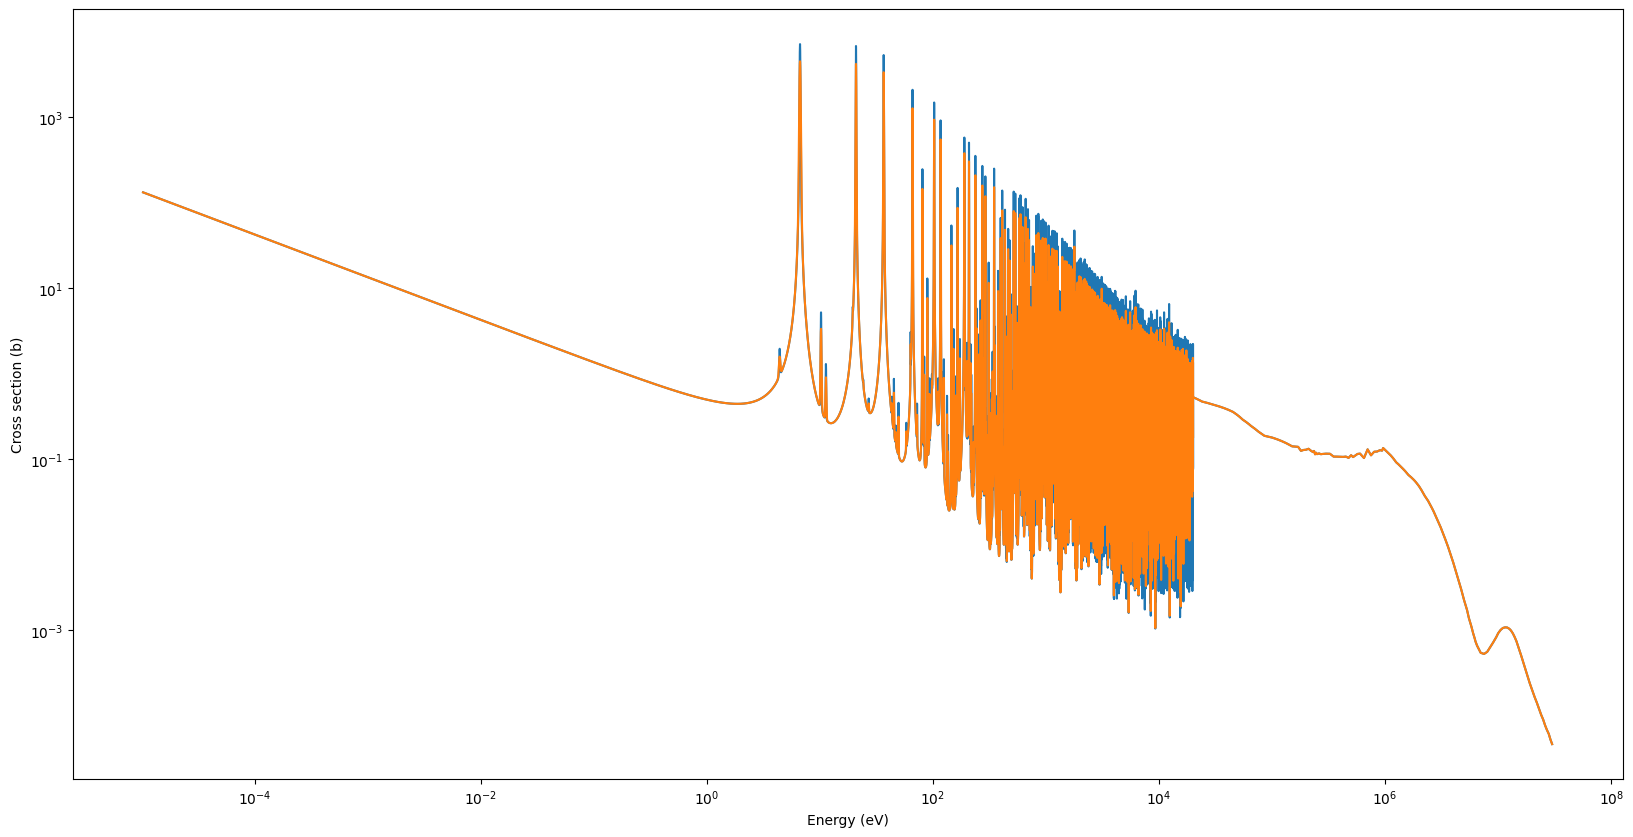

In [70]:
capture = u238_ace[102] 
energies = u238_ace.energy['294K']
capt_xs = capture.xs['294K'](energies)
energies2 = u238_ace.energy['900K']
capt_xs2 = capture.xs['900K'](energies2)
plt.figure(figsize=(20,10))
plt.loglog(energies[1:], capt_xs[1:])
plt.loglog(energies2[1:], capt_xs2[1:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

During the broadening process, the poinwise representation is adjusted to accurately capture the changes near the resonance.  The smoother cross-section variation leads to fewer points as we increase temperature, but the location of these points is different.

In [71]:
print(len(energies))
print(len(energies2))

155207
119576


Text(0, 0.5, 'Cross section (b)')

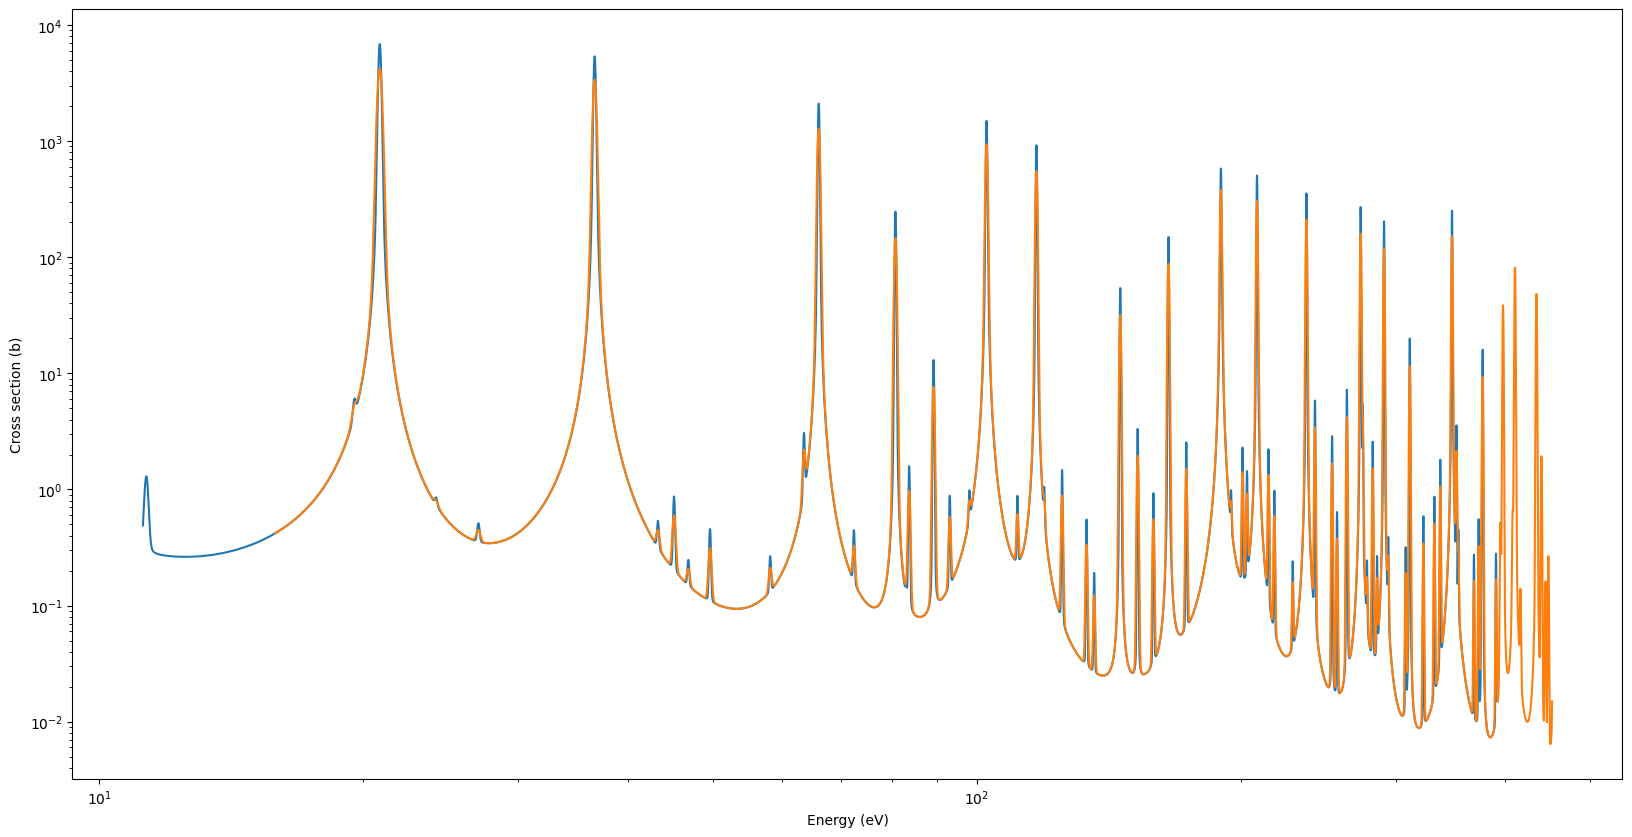

In [72]:
plt.figure(figsize=(20,10))
plt.loglog(energies[1000:10000], capt_xs[1000:10000])
plt.loglog(energies2[1000:10000], capt_xs2[1000:10000])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

Text(0, 0.5, 'Cross section (b)')

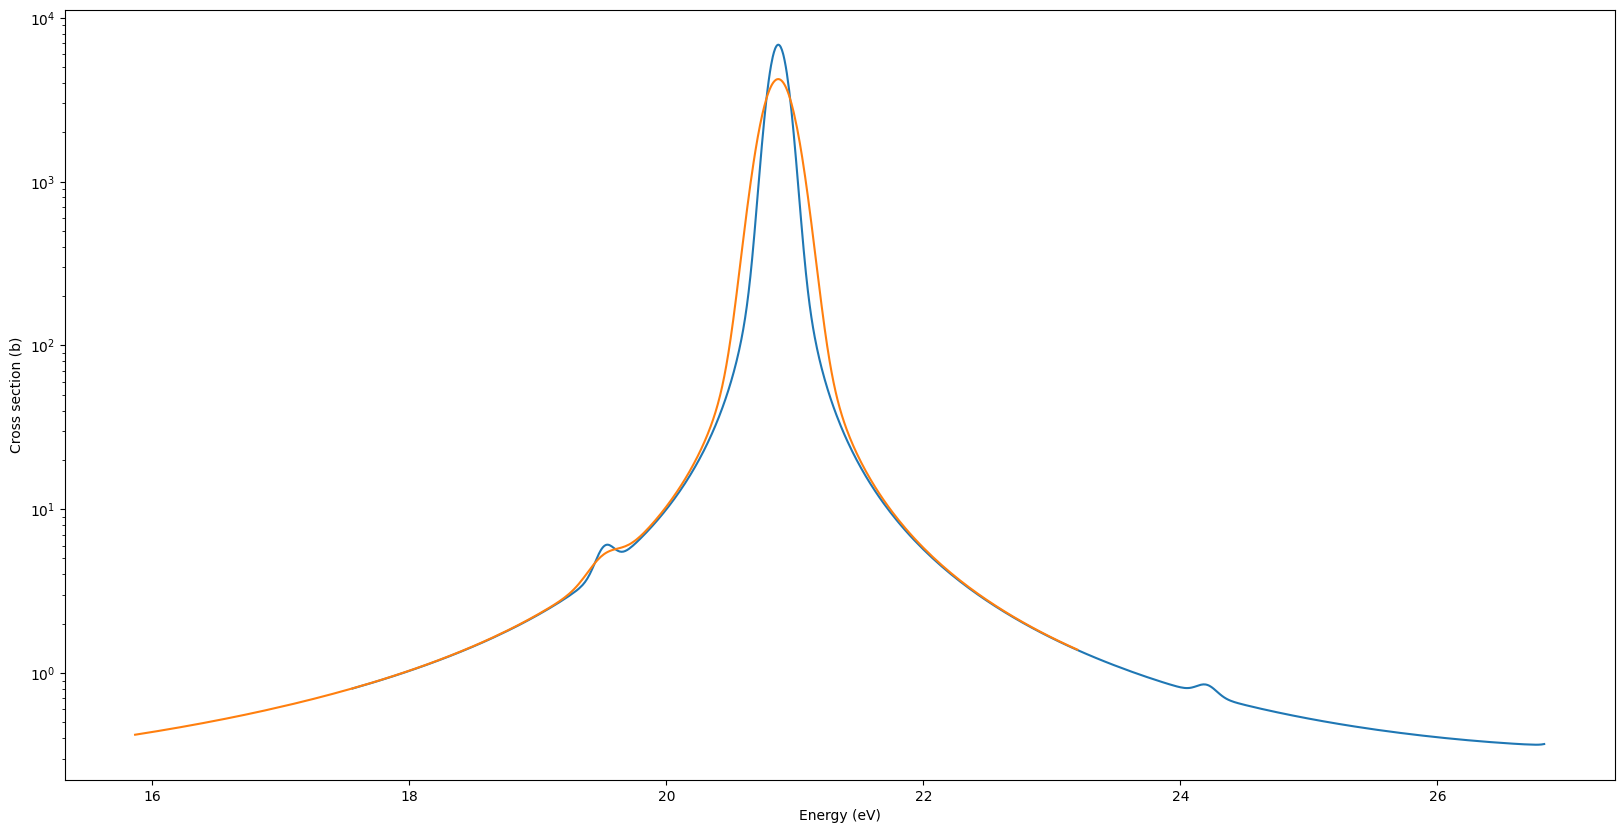

In [73]:
plt.figure(figsize=(20,10))
plt.semilogy(energies[1100:1600], capt_xs[1100:1600])
plt.semilogy(energies2[1000:1400], capt_xs2[1000:1400])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

Threshold reactions are typically not Doppler broadened for reactor applications, but probably should.

Text(0, 0.5, 'Cross section (b)')

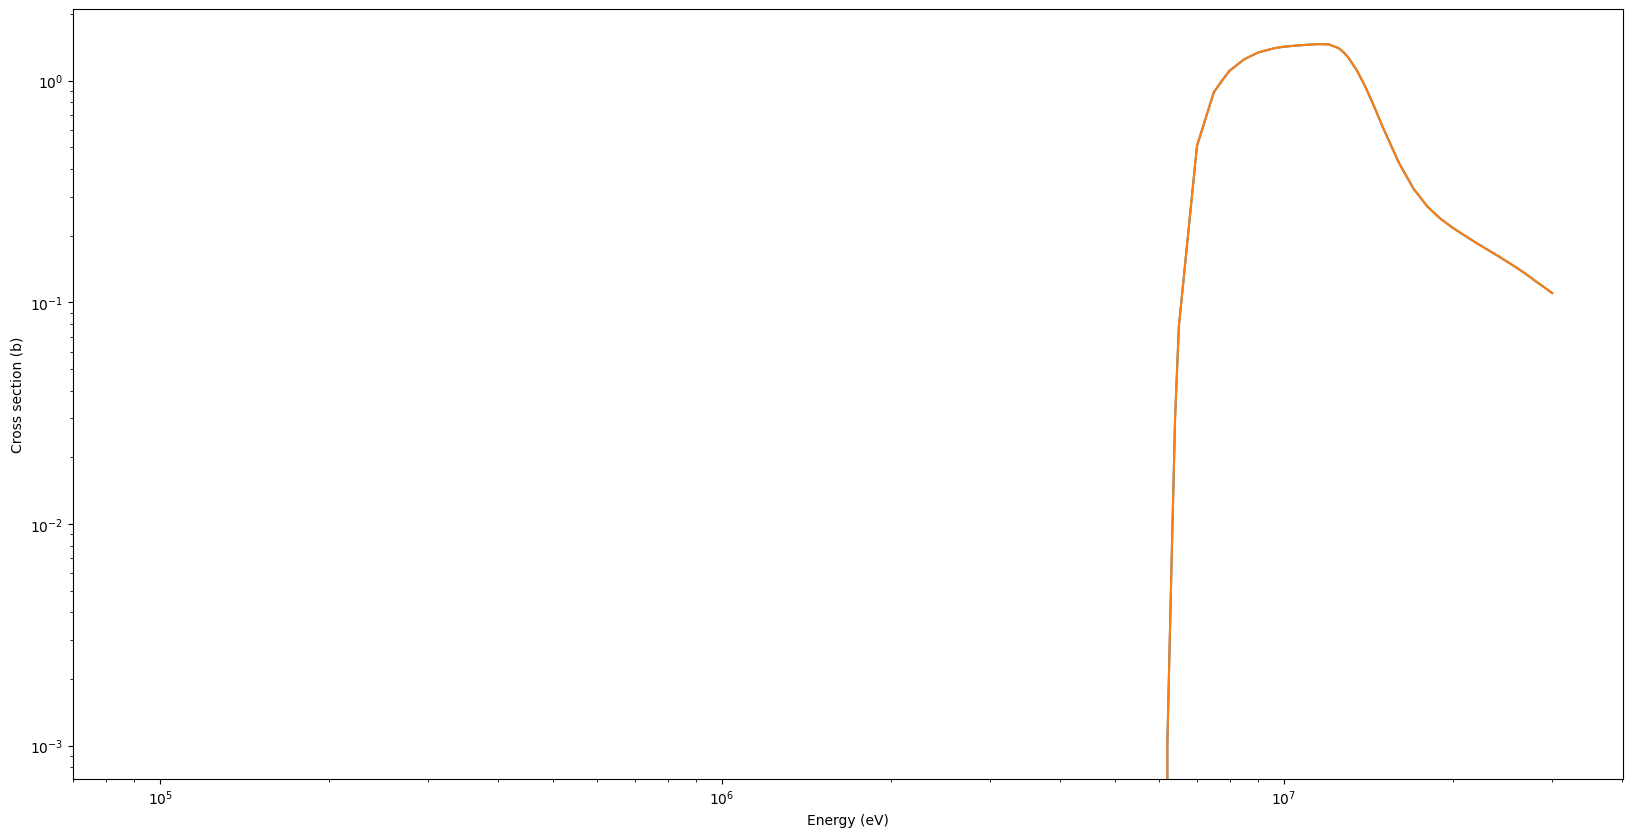

In [74]:
n2n = u238_ace[16] #18 is fission
energies = u238_ace.energy['294K']
n2n_xs = n2n.xs['294K'](energies)
energies2 = u238_ace.energy['900K']
n2n_xs2 = n2n.xs['900K'](energies2)
plt.figure(figsize=(20,10))
plt.loglog(energies[-300:], n2n_xs[-300:])
plt.loglog(energies2[-300:], n2n_xs2[-300:])
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')